In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import re
sns.set()

In [2]:
# Read in comMU metadata
comMU_meta = pd.read_csv('../data/dataset/commu_meta.csv', index_col=0)
comMU_meta.head()

,audio_key,chord_progressions,pitch_range,num_measures,bpm,genre,track_role,inst,sample_rhythm,time_signature,min_velocity,max_velocity,split_data,id
0,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid,8,120,cinematic,main_melody,string_ensemble,standard,4/4,101,102,train,commu00001
1,cmajor,"[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Dm'...",mid_low,8,80,newage,accompaniment,acoustic_piano,standard,4/4,23,30,train,commu00002
2,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid_high,8,150,cinematic,riff,string_violin,standard,4/4,123,127,train,commu00003
3,cmajor,"[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Gm'...",mid,8,110,cinematic,pad,choir,standard,4/4,45,46,train,commu00004
4,aminor,"[['Am', 'Am', 'Am', 'Am', 'Em', 'Em', 'Em', 'E...",mid_low,4,60,cinematic,pad,acoustic_piano,standard,4/4,21,22,train,commu00005


In [8]:
comMU_meta[comMU_meta['num_measures'] == 17]['chord_progressions'].iloc[0]

"[['C', 'C', 'C', 'C', 'C', 'C', 'G', 'G', 'G', 'G', 'G', 'G', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'G7', 'G7', 'G7', 'G7', 'G7', 'G7', 'C', 'C', 'C', 'C', 'C', 'C', 'G', 'G', 'G', 'G', 'G', 'G', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'Dm7', 'Dm7', 'Dm7', 'G7', 'G7', 'C', 'C', 'C', 'C', 'C', 'C', 'C']]"

In [ ]:
[['C', 'C', 'C', 'C', 'C', 'C', 
'G', 'G', 'G', 'G', 'G', 'G', 
'F', 'F', 'F', 'F', 'F', 'F', 
'C', 'C', 'C', 'C', 'C', 'C', 
'F', 'F', 'F', 'F', 'F', 'F', 
'C', 'C', 'C', 'C', 'C', 'C', 
'Dm7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 
'G7', 'G7', 'G7', 'G7', 'G7', 'G7', 
'C', 'C', 'C', 'C', 'C', 'C', 
'G', 'G', 'G', 'G', 'G', 'G', 
'F', 'F', 'F', 'F', 'F', 'F', 
'C', 'C', 'C', 'C', 'C', 'C', 
'F', 'F', 'F', 'F', 'F', 'F', 
'C', 'C', 'C', 'C', 'C', 'C', 
'Dm7', 'Dm7', 'Dm7', 'G7', 'G7',
'C', 'C', 'C', 'C', 'C', 'C', 'C']"

In [9]:
17//2

8

# EDA on comMU Meta

<Figure size 432x288 with 0 Axes>

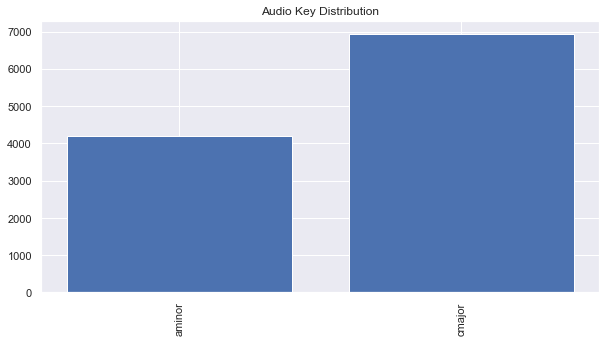

In [3]:

# audio key
audio_key = comMU_meta.groupby('audio_key').count()
plt.clf()
plt.figure(figsize=(10, 5))
plt.bar(audio_key.index, audio_key['id'])
plt.xticks(rotation=90)
plt.title('Audio Key Distribution')
plt.show()

<Figure size 432x288 with 0 Axes>

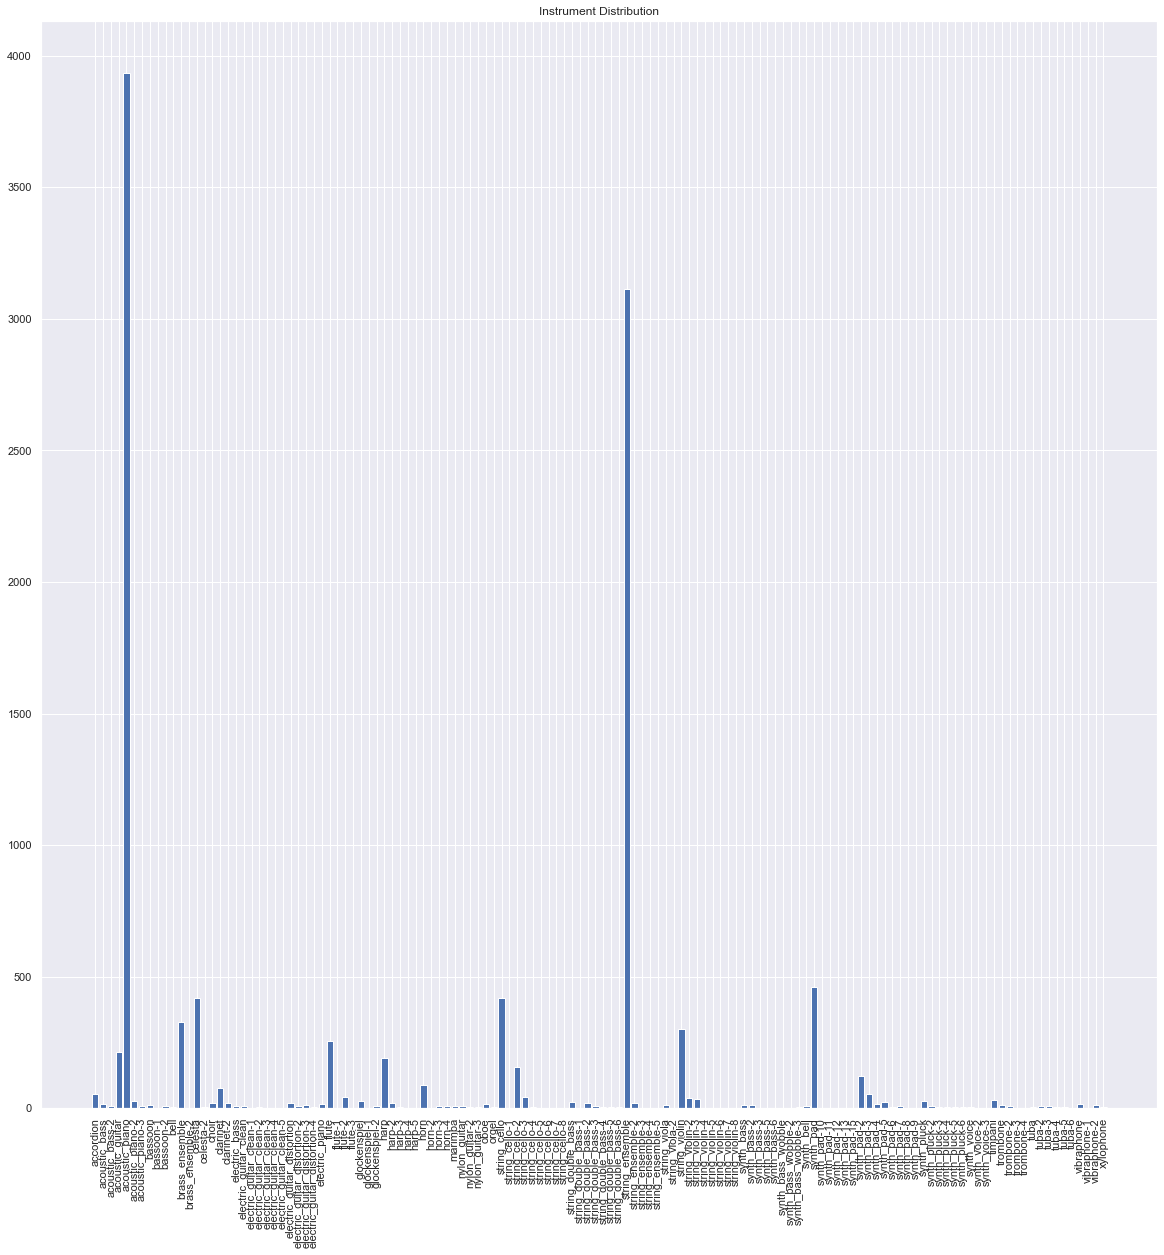

In [4]:
# instrument
inst = comMU_meta.groupby('inst').count()
plt.clf()
plt.figure(figsize=(20, 20))
plt.bar(inst.index, inst['id'])
plt.xticks(rotation=90)
plt.title('Instrument Distribution')
plt.show()

<Figure size 432x288 with 0 Axes>

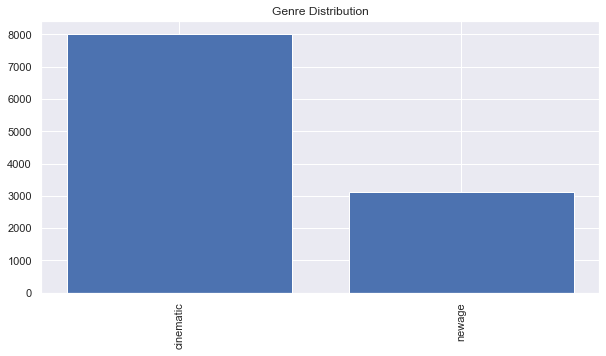

In [130]:
# genre 

genre = comMU_meta.groupby(['genre']).count()
plt.clf()
plt.figure(figsize=(10, 5))
plt.bar(genre.index, genre['id'])
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.show()


<Figure size 432x288 with 0 Axes>

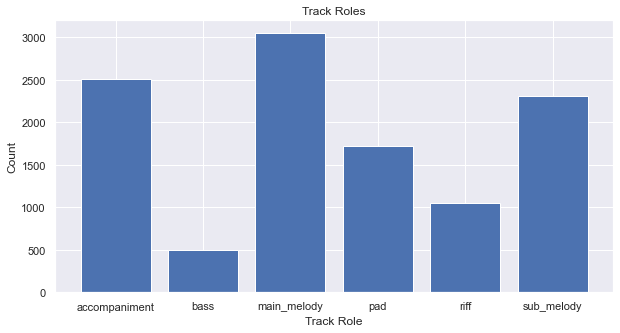

In [131]:
# EDA on comMU metadata
track_roles = comMU_meta.groupby('track_role').count()
plt.clf()
plt.figure(figsize=(10, 5))
plt.bar(track_roles.index, track_roles['id'])
plt.title('Track Roles')
plt.xlabel('Track Role')
plt.ylabel('Count')
plt.show()

<Figure size 432x288 with 0 Axes>

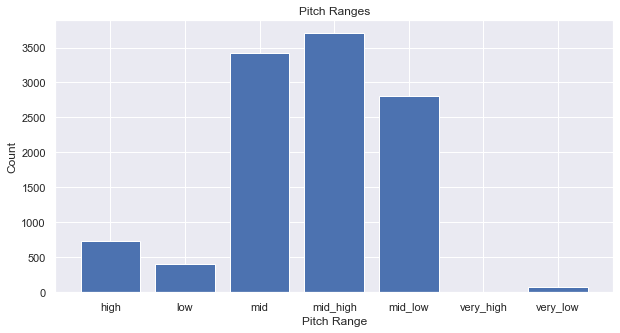

In [132]:
# pitch ranges
pitch_ranges = comMU_meta.groupby('pitch_range').count()
plt.clf()
plt.figure(figsize=(10, 5))
plt.bar(pitch_ranges.index, pitch_ranges['id'])
plt.title('Pitch Ranges')
plt.xlabel('Pitch Range')
plt.ylabel('Count')
plt.show()

<Figure size 432x288 with 0 Axes>

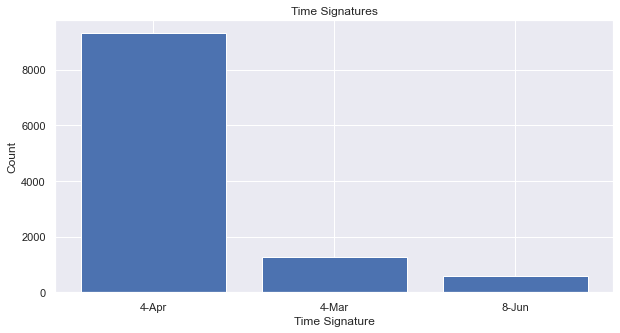

In [133]:
# time signatures
time_sigs = comMU_meta.groupby('time_signature').count()
plt.clf()
plt.figure(figsize=(10, 5))
plt.bar(time_sigs.index, time_sigs['id'])
plt.title('Time Signatures')
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.show()


# Design of the Encoding
[audio key, pitch_range, num_measures, bmp, genre, inst]

In [134]:
# encode [audio key, pitch_range, track role, genre, inst] columns to numeric
# simple case create the word vector using the above columns

# split audio key into note and mode
comMU_meta['audio_key'] = comMU_meta['audio_key'].apply(lambda x: [x[0], x[1:]])

# split pitch range by hyphen
comMU_meta['pitch_range'] = comMU_meta['pitch_range'].apply(lambda x: x.split('_'))

# split track role by hyphen
comMU_meta['track_role'] = comMU_meta['track_role'].apply(lambda x: x.split('_'))

# split instrument by hyphen
comMU_meta['inst'] = comMU_meta['inst'].apply(lambda x: x.replace("-", "_").split('_'))




In [135]:
# combined to captioned list column. And expand the list of list
def expand_list(x):
    data = []
    for sublist in x:
        if type(sublist) == list:
            data.extend(sublist)
        else:
            data.append(sublist)
    return ', '.join(data)


comMU_meta['caption_list'] = comMU_meta[['audio_key','pitch_range', 'track_role', 'genre', 'inst']].values.tolist()
comMU_meta['caption_list'] = comMU_meta['caption_list'].apply(lambda x: expand_list(x))
comMU_meta.to_csv('../data/dataset/commu_meta_caption.csv')

In [16]:
# Process Chord Progression
# transform chord progression string to list

def chord_to_list(x):
    x = x.replace('[', '').replace(']', '').replace("'", '').replace(' ', '').split(',')
    return x

comMU_meta['chord_progressions_list'] = comMU_meta['chord_progressions'].apply(lambda x: chord_to_list(x))
comMU_meta['chord_progressions_length'] = comMU_meta['chord_progressions_list'].apply(lambda x: len(x))
comMU_meta

,audio_key,chord_progressions,pitch_range,num_measures,bpm,genre,track_role,inst,sample_rhythm,time_signature,min_velocity,max_velocity,split_data,id,chord_progressions_list,chord_progressions_length
0,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid,8,120,cinematic,main_melody,string_ensemble,standard,4-Apr,101,102,train,commu00001,"[Am, Am, Am, Am, Am, Am, Am, Am, C, C, C, C, C...",64
1,cmajor,"[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Dm'...",mid_low,8,80,newage,accompaniment,acoustic_piano,standard,4-Apr,23,30,train,commu00002,"[C, C, C, C, C, C, C, C, Dm, Dm, Dm, Dm, Dm, D...",64
2,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid_high,8,150,cinematic,riff,string_violin,standard,4-Apr,123,127,train,commu00003,"[Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, A...",64
3,cmajor,"[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Gm'...",mid,8,110,cinematic,pad,choir,standard,4-Apr,45,46,train,commu00004,"[C, C, C, C, C, C, C, C, Gm, Gm, Gm, Gm, Gm, G...",64
4,aminor,"[['Am', 'Am', 'Am', 'Am', 'Em', 'Em', 'Em', 'E...",mid_low,4,60,cinematic,pad,acoustic_piano,standard,4-Apr,21,22,train,commu00005,"[Am, Am, Am, Am, Em, Em, Em, Em, F, F, F, F, F...",32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,cmajor,"[['Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7',...",mid_high,8,110,cinematic,pad,synth_pad,standard,4-Apr,83,84,val,commu11140,"[Fmaj7, Fmaj7, Fmaj7, Fmaj7, Fmaj7, Fmaj7, Fma...",64
11140,cmajor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid_low,8,110,cinematic,riff,acoustic_guitar,standard,4-Apr,51,55,val,commu11141,"[Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, A...",64
11141,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",very_low,8,145,cinematic,bass,string_ensemble,standard,4-Apr,109,112,val,commu11142,"[Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, A...",64
11142,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",low,8,140,cinematic,accompaniment,string_cello,standard,4-Apr,55,115,val,commu11143,"[Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, A...",64
